In [ ]:
import pandas as pd
import seaborn as sns


In [ ]:
corpus = pd.read_csv('/content/Elon_musk (1).csv',encoding='cp1252',index_col=0)
corpus

,Text
1,@kunalb11 I’m an alien
2,@ID_AA_Carmack Ray tracing on Cyberpunk with H...
3,@joerogan @Spotify Great interview!
4,@gtera27 Doge is underestimated
5,@teslacn Congratulations Tesla China for amazi...
...,...
1995,"@flcnhvy True, it sounds so surreal, but the n..."
1996,@PPathole Make sure to read ur terms &amp; con...
1997,@TeslaGong @PPathole Samwise Gamgee
1998,@PPathole Altho Dumb and Dumber is <U+0001F525...


In [ ]:
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [ ]:
import re
pattern = re.compile('@[a-zA-Z_.]+')
pattern1 = re.compile(r'<U\+([0-9a-fA-F]+)>')
pattern2 = re.compile('(https.+)|(http.+)')
result = pattern2.findall('Under Vegas in tunnel yesterday with my boys https://t.co/tLfOuiEdFm')
print(result) 

[('https://t.co/tLfOuiEdFm', '')]


In [ ]:
# removing punctuation and numbers

def remove_punct(text):
  remove_p = [word for word in text if not pattern.findall(word) and not pattern1.findall(word) ]
  remove_uni = ' '.join([word for word in remove_p if not pattern1.findall(word) ])
  
  return remove_uni

corpus['remove_punct'] = corpus['Text'].apply(lambda x : remove_punct(x.split()))

In [ ]:
# removing punctuation and numbers

def remove_tags(text):
  remove_tags = ' '.join([word for word in text if not pattern2.findall(word) ])
  
  return remove_tags

corpus['remove_tags'] = corpus['remove_punct'].apply(lambda x : remove_tags(x.split()))

In [ ]:
corpus

,Text,remove_punct,remove_tags
1,@kunalb11 I’m an alien,I’m an alien,I’m an alien
2,@ID_AA_Carmack Ray tracing on Cyberpunk with H...,Ray tracing on Cyberpunk with HDR is next-leve...,Ray tracing on Cyberpunk with HDR is next-leve...
3,@joerogan @Spotify Great interview!,Great interview!,Great interview!
4,@gtera27 Doge is underestimated,Doge is underestimated,Doge is underestimated
5,@teslacn Congratulations Tesla China for amazi...,Congratulations Tesla China for amazing execut...,Congratulations Tesla China for amazing execut...
...,...,...,...
1995,"@flcnhvy True, it sounds so surreal, but the n...","True, it sounds so surreal, but the negative p...","True, it sounds so surreal, but the negative p..."
1996,@PPathole Make sure to read ur terms &amp; con...,Make sure to read ur terms &amp; conditions be...,Make sure to read ur terms &amp; conditions be...
1997,@TeslaGong @PPathole Samwise Gamgee,Samwise Gamgee,Samwise Gamgee
1998,@PPathole Altho Dumb and Dumber is <U+0001F525...,Altho Dumb and Dumber is,Altho Dumb and Dumber is


In [ ]:
from textblob import TextBlob

In [ ]:
def remove_char(text):
  remove_tags = ''.join([word for word in text if word not in string.punctuation])
  
  return remove_tags

corpus['remove_char'] = corpus['remove_tags'].apply(lambda x : remove_char(x))

In [ ]:
drop_index = corpus[corpus['remove_char'] == ''].index.to_list()

In [ ]:
corpus.drop(drop_index,inplace=True,axis=0)

In [ ]:
# from google_trans_new import google_translator
# translator = google_translator()

# def German_translation(x):
#   # german_translation = translator.translate(x,lang_tgt='en')
#   translator = google_translator() 
#   translate_text = translator.translate(x,lang_tgt='de')  
#   return translate_text

# # def English_translation(x):
# #   english_translation = translator.translate(German_translation(x),dest='en')
# #   return english_translation




# corpus['translated'] = corpus['remove_char'].apply(lambda x : German_translation(x))





In [ ]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

vd = SentimentIntensityAnalyzer()

def label(text):
  sentiment_dict = vd.polarity_scores(text)
  if sentiment_dict['compound'] >= 0.5:
    tag = 'positive'
  elif sentiment_dict['compound'] <= -0.5:
    tag = 'negative'
  else:
    tag = 'neutral'
  return tag

corpus['label'] = corpus['remove_char'].apply(lambda x : label(x))

In [ ]:
corpus

,Text,remove_punct,remove_tags,remove_char
1,@kunalb11 I’m an alien,I’m an alien,I’m an alien,I’m an alien
2,@ID_AA_Carmack Ray tracing on Cyberpunk with H...,Ray tracing on Cyberpunk with HDR is next-leve...,Ray tracing on Cyberpunk with HDR is next-leve...,Ray tracing on Cyberpunk with HDR is nextlevel...
3,@joerogan @Spotify Great interview!,Great interview!,Great interview!,Great interview
4,@gtera27 Doge is underestimated,Doge is underestimated,Doge is underestimated,Doge is underestimated
5,@teslacn Congratulations Tesla China for amazi...,Congratulations Tesla China for amazing execut...,Congratulations Tesla China for amazing execut...,Congratulations Tesla China for amazing execut...
...,...,...,...,...
1995,"@flcnhvy True, it sounds so surreal, but the n...","True, it sounds so surreal, but the negative p...","True, it sounds so surreal, but the negative p...",True it sounds so surreal but the negative pro...
1996,@PPathole Make sure to read ur terms &amp; con...,Make sure to read ur terms &amp; conditions be...,Make sure to read ur terms &amp; conditions be...,Make sure to read ur terms amp conditions befo...
1997,@TeslaGong @PPathole Samwise Gamgee,Samwise Gamgee,Samwise Gamgee,Samwise Gamgee
1998,@PPathole Altho Dumb and Dumber is <U+0001F525...,Altho Dumb and Dumber is,Altho Dumb and Dumber is,Altho Dumb and Dumber is


In [ ]:
# def label(text):
#   tb = TextBlob(text)
#   if tb.sentiment[0] >= 0.5:
#     tag = 'positive'
#   elif tb.sentiment[0] <= 0:
#     tag = 'neutral'
#   else:
#     tag = 'negative'
#   return tag

# corpus['label'] = corpus['remove_char'].apply(lambda x : label(x))


In [ ]:
# drop_index1 = corpus[corpus['label'] == 'neutral'].index.to_list()

In [ ]:
# corpus.drop(drop_index1,inplace=True,axis=0)

In [ ]:
corpus['label'].value_counts()

neutral     981
negative    636
positive    246
Name: label, dtype: int64

<Axes: xlabel='label', ylabel='count'>

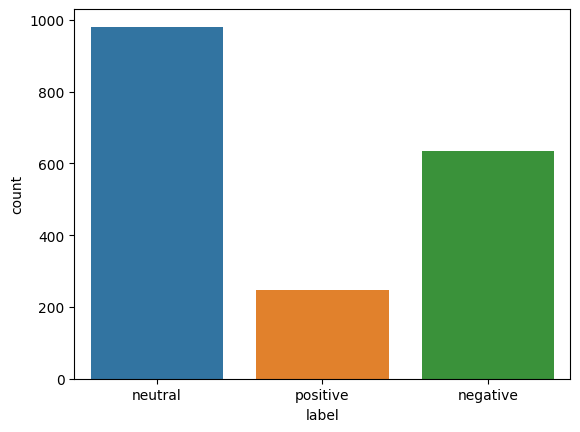

In [ ]:
sns.countplot(x=corpus['label'])

In [ ]:
from sklearn.model_selection import KFold,cross_val_score
from sklearn.model_selection import train_test_split


kfold = KFold(n_splits=20,shuffle=True,random_state=123)

X_train,X_test,y_train,y_test = train_test_split(corpus['remove_char'],corpus['label'],test_size=0.2,random_state=123)



In [ ]:
from sklearn.ensemble import RandomForestClassifier

classifier = RandomForestClassifier()



In [ ]:
from sklearn.model_selection import GridSearchCV

forest_params = [{'n_estimators':list(range(100,150)), 'max_depth': list(range(30, 50))}]



In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

td = TfidfVectorizer()

In [ ]:
from sklearn.svm import SVC


sv = SVC()

In [ ]:
from sklearn.pipeline import Pipeline


cls = Pipeline([('tfidf',td),('classifier',sv)])

In [ ]:
random_grid = {
'classifier__n_estimators':list(range(100,150,10)),
'classifier__max_depth': list(range(40,80,10 ))}

random_grid1 = {'classifier__C': [0.1, 1, 10, 100, 1000], 
              'classifier__gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'classifier__kernel': ['rbf','sigmoid']}
clf = GridSearchCV(cls,param_grid = random_grid1,cv=20,scoring='accuracy',n_jobs=-1)

In [ ]:
clf.fit(X_train,y_train)

GridSearchCV(cv=20,
             estimator=Pipeline(steps=[('tfidf', TfidfVectorizer()),
                                       ('classifier', SVC())]),
             n_jobs=-1,
             param_grid={'classifier__C': [0.1, 1, 10, 100, 1000],
                         'classifier__gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'classifier__kernel': ['rbf', 'sigmoid']},
             scoring='accuracy')

In [ ]:
clf.score(X_train,y_train)  

0.9959731543624161

In [ ]:
print(clf.best_params_)

{'classifier__C': 10, 'classifier__gamma': 0.1, 'classifier__kernel': 'rbf'}


In [ ]:
clf.score(X_test,y_test)

0.7908847184986595

In [ ]:
y_pred  = clf.predict(['this is amazing'])
y_pred

array(['positive'], dtype=object)

In [ ]:
from sklearn.metrics import accuracy_score,confusion_matrix

accuracy_score(y_test,y_pred)

0.7908847184986595

<Axes: >

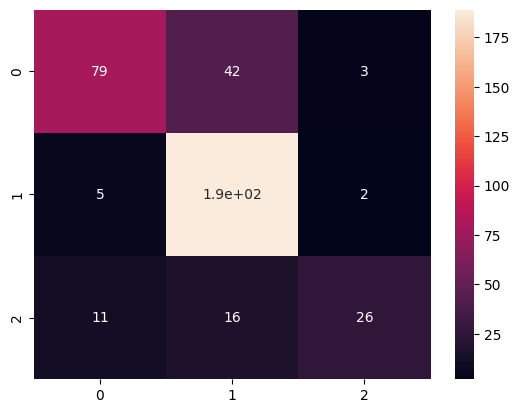

In [ ]:
sns.heatmap(confusion_matrix(y_test,y_pred),annot=True)

In [ ]:
from sklearn.metrics import classification_report

print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

    negative       0.83      0.64      0.72       124
     neutral       0.77      0.96      0.85       196
    positive       0.84      0.49      0.62        53

    accuracy                           0.79       373
   macro avg       0.81      0.70      0.73       373
weighted avg       0.80      0.79      0.78       373

